<a href="https://colab.research.google.com/github/jacob7123/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem, but in our case, we are going to simplify it: predixting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [6]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view ans fit

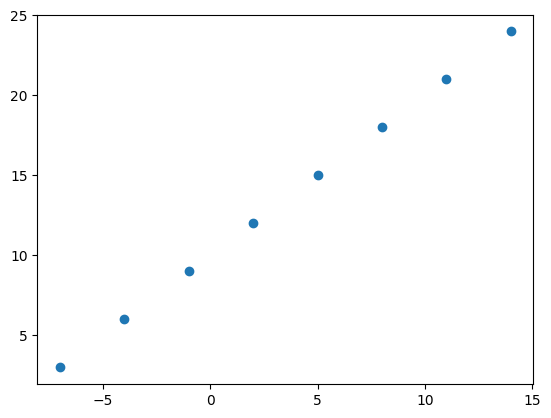

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

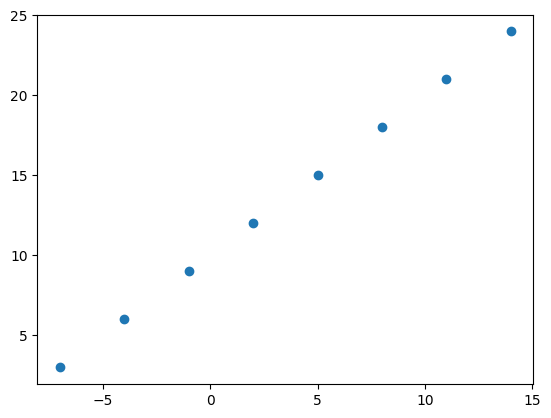

In [ ]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input ans output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** - define the loss function(in others words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
       optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent
       metrics = ["mae"] )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 755ms/step - loss: 18.8089 - mae: 18.8089
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 18.5277 - mae: 18.5277
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 18.2464 - mae: 18.2464
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 17.9652 - mae: 17.9652
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 17.6839 - mae: 17.6839


In [ ]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 165ms/step


array([[-15.119325]], dtype=float32)

In [ ]:
y_pred + 11

array([[-4.1193247]], dtype=float32)

## Impoving our model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs**(leave it training for longer) or on more data(give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 621ms/step - loss: 8.6479 - mae: 8.6479
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 8.5154 - mae: 8.5154
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3829 - mae: 8.3829
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2504 - mae: 8.2504
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1179 - mae: 8.1179
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 7.9854 - mae: 7.9854
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.8529 - mae: 7.8529
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 7.7204 - mae: 7.7204
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 7.5879 - mae: 7.5879
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 7.4554 - mae: 7.4554
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - l

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has inproved...
model.predict([17])

1/1 [==============================] - 0s 98ms/step


array([[30.292137]], dtype=float32)

###Exercise

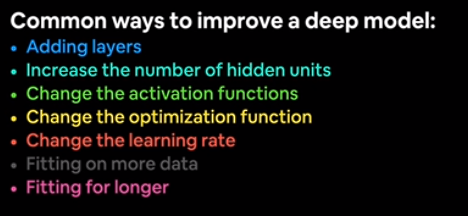

In [4]:
# Let's make model

# 1. Create the model(this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
      #  optimizer = tf.keras.optimizers.SGD(),
       optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 534ms/step - loss: 14.3105 - mae: 14.3105
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6055 - mae: 13.6055
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8974 - mae: 12.8974
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1859 - mae: 12.1859
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4702 - mae: 11.4702
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7488 - mae: 10.7488
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0191 - mae: 10.0191
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2787 - mae: 9.2787
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5249 - mae: 8.5249
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7552 - mae: 7.7552
Epoch 11/100
1/1 [==============================] - 0s 7ms/step

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17])

1/1 [==============================] - 0s 151ms/step


array([[26.391869]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it ->  evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predixtions of the model - how do
the predictions of a model line up against the ground truth(the original labels)?

In [7]:
# Make a biffer dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [8]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

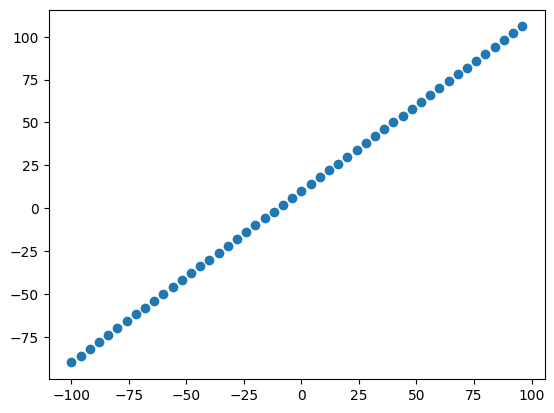

In [9]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% the total data you have available.
* **Validation set** - the model gets tuned on this data, which typically 10-15% of the data availible.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [10]:
# Split the data onto train and test sets
X_train = X[:40] # first 40 are training samples(80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are  testing samples(20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in training and the sets... Let's visualize it again

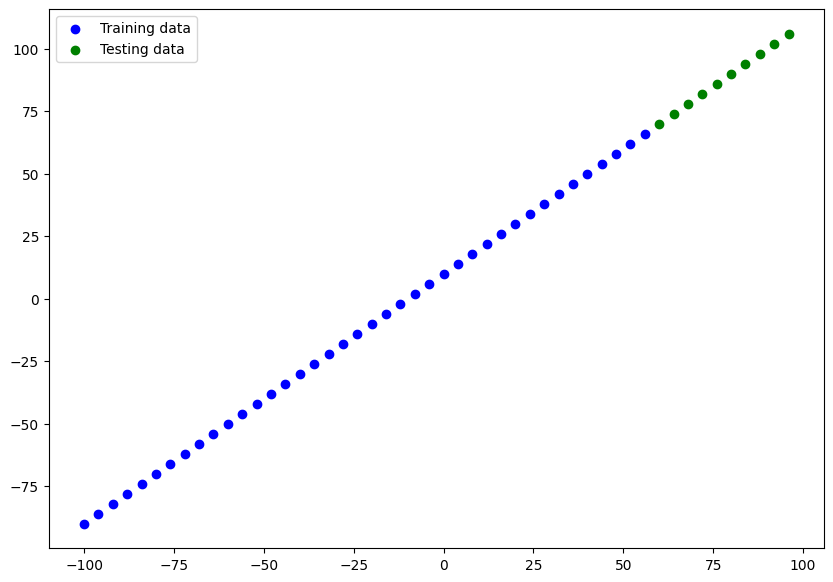

In [37]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = 'b', label = "Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c = 'g', label = "Testing data") # want our model to be able to predict this(given X, what is y?)
# Show a legend
plt.legend()

In [8]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
# model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

###Visualizing the model

In [ ]:
# model.summary()

In [15]:
# Let's creaste a model which building  automatically the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model(same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer1"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# 2. Compile the model(same as above)
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

In [81]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - there are the parameters(patterns)the model can update as it trains.
* Non-trainable params - these parameters are not updated during training(this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters(total and trainable) bt calling `model.summary()`.

In [16]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200, verbose = 0)

In [17]:
# Get the summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


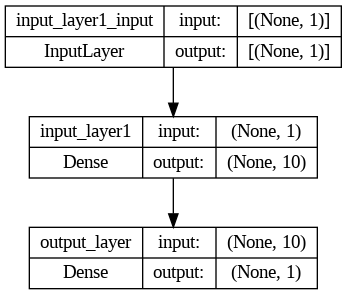

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

###Visualizing our model's predictions

To visualize predition, it is a good idea to plot them against the ground truth labels.

Often toy will see this in the form of `y_test` or `y_true` versus `y_pred`(ground truth versus your model's prediction).


In [19]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[58.231537],
       [61.916264],
       [65.601   ],
       [69.28573 ],
       [72.97047 ],
       [76.655205],
       [80.339935],
       [84.024666],
       [87.70939 ],
       [91.39414 ]], dtype=float32)

In [96]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you are going to reuse some kind of functionality in the future, it is a good idea to turn it into a function

In [20]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
           train_labels = y_train,
           test_data = X_test,
           test_labels = y_test,
           predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = "Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = 'r', label = "Prediction data")
  # Show a legend
  plt.legend()

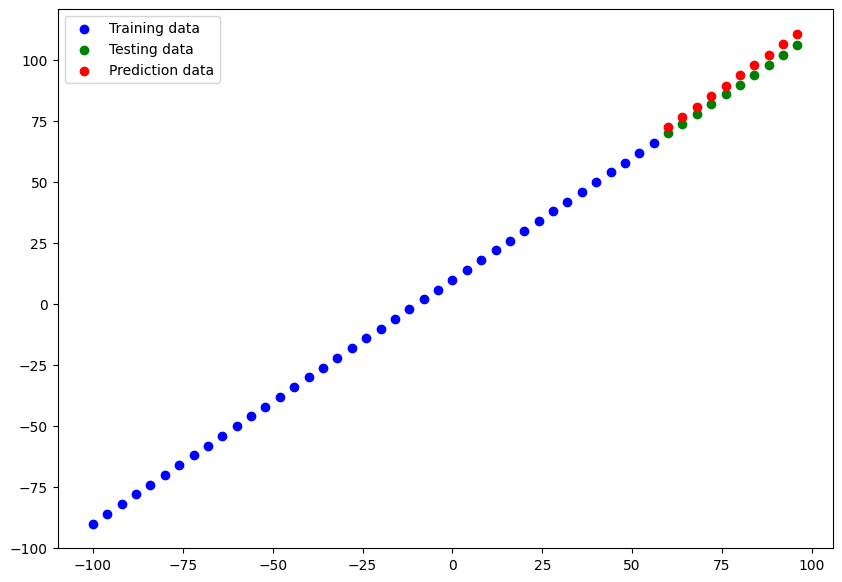

In [99]:
plot_predictions()

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrixs to evalute your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [100]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 3.6322 - mae: 3.6322


[3.632246494293213, 3.632246494293213]

In [101]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.02558 , 13.163958, 11.205816, 10.151166, 10.      , 10.752322,
       12.412195, 15.023236, 18.537766, 22.79647 ], dtype=float32)>

In [102]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 72.468025],
       [ 76.72674 ],
       [ 80.98546 ],
       [ 85.24417 ],
       [ 89.50289 ],
       [ 93.76161 ],
       [ 98.020325],
       [102.279045],
       [106.537766],
       [110.79647 ]], dtype=float32)>

In [103]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [104]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.468025,  76.72674 ,  80.98546 ,  85.24417 ,  89.50289 ,
        93.76161 ,  98.020325, 102.279045, 106.537766, 110.79647 ],
      dtype=float32)>

In [105]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                   y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.6322503>

In [106]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                   y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.745451>

In [2]:
# Make some functions to MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                      y_pred = tf.squeeze(tf.squeeze(y_pred)))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                     y_pred = tf.squeeze(tf.squeeze(y_pred)))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evalute it ...
```

1. Fet more data - get mopre examples for your model to train on(more opportunities to learn patterns or relationships between features and labels).
2. Make your model latger(using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer and trained for 100 epochs.
2. `model_2` - 2 layers and trained for 100 epochs.
3. `mosel_3` - 2 layers and trianed for 500 epochs.

**Build** `model_1`

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 73.1767 - mae: 73.1767
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 37.8735 - mae: 37.8735
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 8.7863 - mae: 8.7863
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6047 - mae: 9.6047
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5162 - mae: 10.5162
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7399 - mae: 9.7399
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8318 - mae: 8.8318
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0847 - mae: 9.0847
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.3699 - mae: 19.3699
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4719 - mae: 10.4719
Epoch 11/100
2/2 [==============================] - 0s 10ms/step 

1/1 [==============================] - 0s 66ms/step


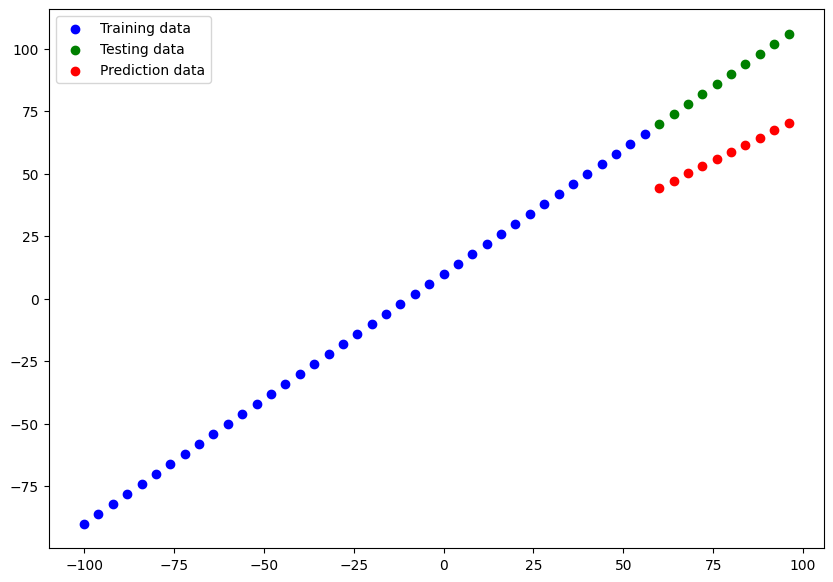

In [24]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [25]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.692493>,
 <tf.Tensor: shape=(), dtype=float32, numpy=952.5057>)

**Build** `model_2`
* 2 layers and trained for 100 epochs

In [41]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 39.7284 - mse: 2273.5857
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 27.7816 - mse: 1008.8197
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 33.1252 - mse: 1637.2288
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 26.5724 - mse: 1030.3458
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.5533 - mse: 262.1835
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6064 - mse: 155.8054
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6629 - mse: 215.3777
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0351 - mse: 151.0345
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.7315 - mse: 2475.5535
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2209 - mse: 1042.6401
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 55ms/step


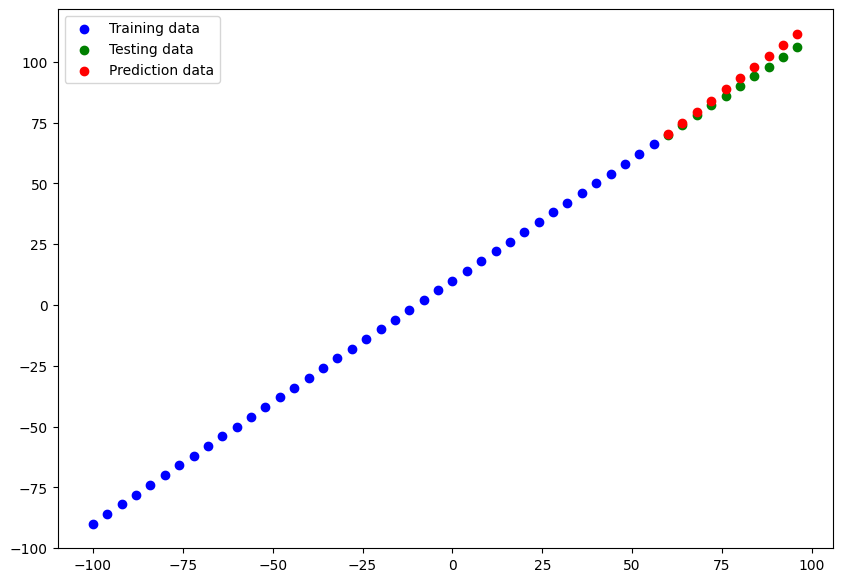

In [42]:
# Make and plot prediction of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [43]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9069557>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.170926>)

**Build `model_3`**
* 2 layers and trained for 500 epochs

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 43.2687 - mae: 43.2687
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 32.4268 - mae: 32.4268
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 35.8212 - mae: 35.8212
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 14.2829 - mae: 14.2829
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 20.2809 - mae: 20.2809
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 8.6653 - mae: 8.6653
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 16.5060 - mae: 16.5060
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 16.8924 - mae: 16.8924
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 29.2690 - mae: 29.2690
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 13.9742 - mae: 13.9742
Epoch 11/500
2/2 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 33ms/step


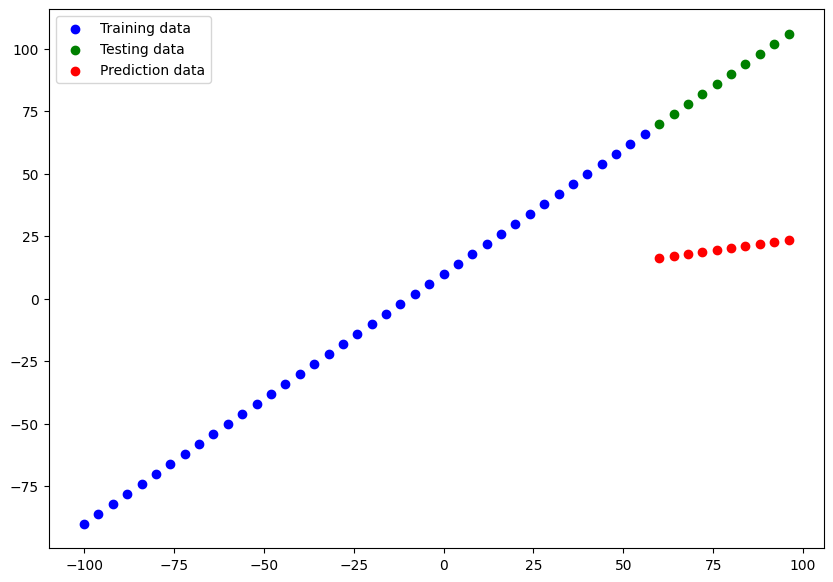

In [47]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [48]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.9433>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4700.6016>)

🔑 **Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We have run a few experiments. Let's compare the results.

In [52]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
          ["model_2", mae_2.numpy(), mse_2.numpy()],
          ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "MAE", "MSE"])
all_results

,model,MAE,MSE
0,model_1,30.692493,952.505676
1,model_2,2.906956,11.170926
2,model_3,67.943298,4700.601562


Looks like `model_2` performed the best

In [53]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which do not work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking you experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when it doing so, it can be tedious if you are running lots of experiment.

Luckily, there are tools to help us!

**Resource:** As you build more models, you will want to look in using:

* Tensorboard - a component of the TensorFlow library to help track modelling experiments(we will see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments(plugs straight into TensorBoard).


## Saving our models

Saving our models allows us to use them outside of Google Colab(or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SaveModel format
2. The HDF5 format

In [54]:
# Save model using SaveModel format
model_2.save("best_model_SaveModel_format")

In [55]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
